In [4]:
from numpy.random import seed
import os
import random
import numpy as np
import skimage
import matplotlib.pyplot as plt
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau, TensorBoard
from keras import backend as keras
from utils import DataGenerator
from unet import *
from main import showHistory, TrainValTensorBoard


In [5]:
params = {'batch_size':1,
          'dim':(128,128,128),
          'n_channels':1,
          'shuffle': True}
seismPathT = "../../data_seismic/train/seis/"
faultPathT = "../../data_seismic/train/fault/"
seismPathV = "../../data_seismic/validation/seis/"
faultPathV = "../../data_seismic/validation/fault/"
train_ID = range(200)
valid_ID = range(20)
train_generator = DataGenerator(dpath=seismPathT,fpath=faultPathT,
                                data_IDs=train_ID,**params)
valid_generator = DataGenerator(dpath=seismPathV,fpath=faultPathV,
                                data_IDs=valid_ID,**params)
model = unet(input_size=(None, None, None,1))
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 None, 1)]                                                        
                                                                                                  
 conv3d_15 (Conv3D)             (None, None, None,   448         ['input_2[0][0]']                
                                None, 16)                                                         
                                                                                                  
 conv3d_16 (Conv3D)             (None, None, None,   6928        ['conv3d_15[0][0]']              
                                None, 16)                                                   

In [6]:
# checkpoint
filepath="check1/fseg-{epoch:02d}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', 
      verbose=1, save_best_only=False, mode='max')
logging = TrainValTensorBoard()
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, 
#                              patience=20, min_lr=1e-8)
callbacks_list = [checkpoint, logging]
print("data prepared, ready to train!")
# Fit the model
history=model.fit_generator(generator=train_generator,
validation_data=valid_generator,epochs=100,callbacks=callbacks_list,verbose=1)
model.save('check1/fseg.hdf5')

data prepared, ready to train!


/tmp/ipykernel_125208/3539419442.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_generator,


Epoch 1/100


2023-05-12 17:36:41.608557: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101


200/200 [==============================] - ETA: 0s - loss: 0.2878 - accuracy: 0.9223
Epoch 1: saving model to check1/fseg-01.hdf5
check point
200/200 [==============================] - 171s 800ms/step - loss: 0.2878 - accuracy: 0.9223 - val_loss: 0.2592 - val_accuracy: 0.9277
Epoch 2/100
200/200 [==============================] - ETA: 0s - loss: 0.2465 - accuracy: 0.9299
Epoch 2: saving model to check1/fseg-02.hdf5
check point
200/200 [==============================] - 160s 801ms/step - loss: 0.2465 - accuracy: 0.9299 - val_loss: 0.2429 - val_accuracy: 0.9277
Epoch 3/100
200/200 [==============================] - ETA: 0s - loss: 0.2129 - accuracy: 0.9300
Epoch 3: saving model to check1/fseg-03.hdf5
check point
200/200 [==============================] - 161s 802ms/step - loss: 0.2129 - accuracy: 0.9300 - val_loss: 0.1875 - val_accuracy: 0.9290
Epoch 4/100
200/200 [==============================] - ETA: 0s - loss: 0.1766 - accuracy: 0.9363
Epoch 4: saving model to check1/fseg-04.hdf5
che

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


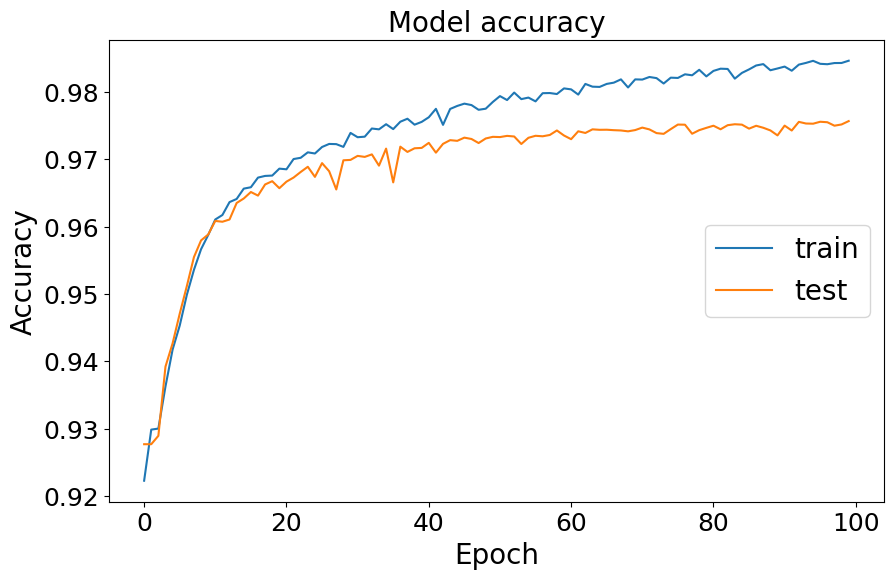

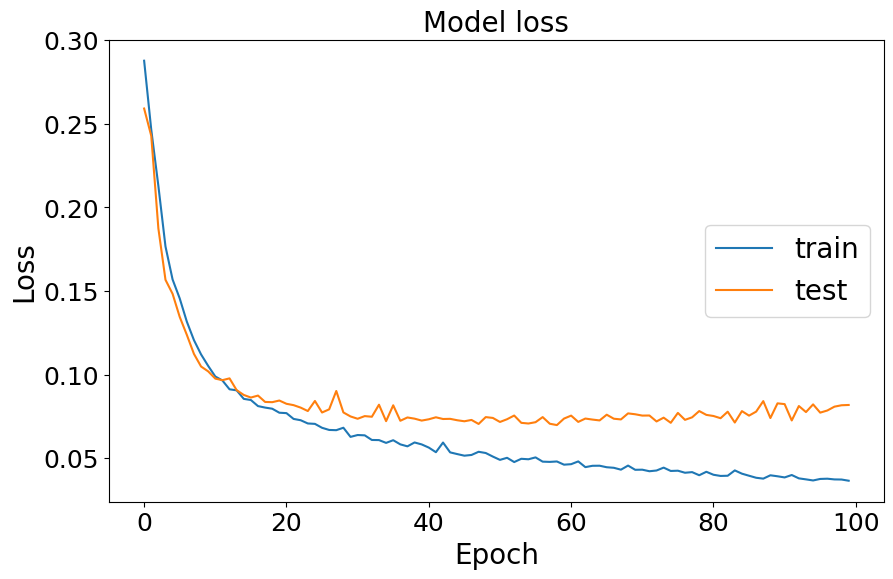

In [7]:
showHistory(history)